In [1]:
%matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import glob
import re
import pandas as pd
from IPython.display import display, Markdown
from keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 50)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Using TensorFlow backend.


In [2]:
model_path = 'results/59-oxford-autoencoder-1-30-01/model'
data_path = 'dataset/8. oxford-normalized-30/'
param_files = sorted(glob.glob(model_path + '/*/'))
print(param_files)

['results/59-oxford-autoencoder-1-30-01/model\\2018-03-15-18-58-22\\', 'results/59-oxford-autoencoder-1-30-01/model\\2018-03-15-19-13-06\\', 'results/59-oxford-autoencoder-1-30-01/model\\2018-03-15-19-28-47\\', 'results/59-oxford-autoencoder-1-30-01/model\\2018-03-15-19-44-41\\', 'results/59-oxford-autoencoder-1-30-01/model\\2018-03-15-19-59-09\\', 'results/59-oxford-autoencoder-1-30-01/model\\2018-03-15-20-12-23\\', 'results/59-oxford-autoencoder-1-30-01/model\\2018-03-15-20-26-06\\']


In [3]:
# Load datasets
x_train = pickle.load(open(data_path + "x_train.p", "rb"))
y_train = pickle.load(open(data_path + "y_train.p", "rb"))
x_test = pickle.load(open(data_path + "x_test.p", "rb"))
y_test = pickle.load(open(data_path + "y_test.p", "rb"))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(136, 22)
(136, 2)
(59, 22)
(59, 2)


In [4]:
# Get minimum or maximum point in a dataframe
def get_row_extreme(df, col, maximum):
    if (maximum):
        index = df[col].idxmax()
    else:
        index = df[col].idxmin()
    row = df.iloc[index]
    return row

# Highlight max/min points
def highlight_extreme(df, col, plt, maximum):
    row = get_row_extreme(df, col, maximum)
    plt.plot(row['epoch'], row[col], 'o')
    return row[col]

***

results/59-oxford-autoencoder-1-30-01/model\2018-03-15-18-58-22\weights.hdf5
too many values to unpack (expected 4)


,0
Batch Size,20
Decay,0.0001
Dropout,0.2
Epochs,10000
Hidden layer units,10
Learning Rate,0.0001
Loss,<function mean_squared_error at 0x000001D721FE2268>
Test size,30
Directory,results/59-oxford-autoencoder-1-30-01/model\2018-03-15-18-58-22\
Max acc,0.661765


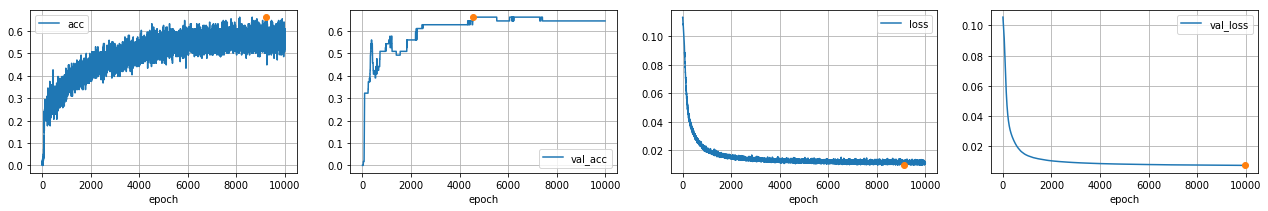

***

results/59-oxford-autoencoder-1-30-01/model\2018-03-15-19-13-06\weights.hdf5
too many values to unpack (expected 4)


,0
Batch Size,20
Decay,0.0001
Dropout,0.2
Epochs,10000
Hidden layer units,12
Learning Rate,0.0001
Loss,<function mean_squared_error at 0x000001D721FE2268>
Test size,30
Directory,results/59-oxford-autoencoder-1-30-01/model\2018-03-15-19-13-06\
Max acc,0.727941


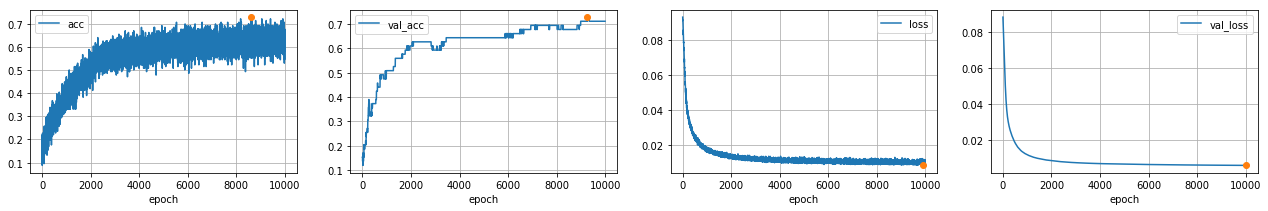

***

results/59-oxford-autoencoder-1-30-01/model\2018-03-15-19-28-47\weights.hdf5
too many values to unpack (expected 4)


,0
Batch Size,20
Decay,0.0001
Dropout,0.2
Epochs,10000
Hidden layer units,8
Learning Rate,0.0001
Loss,<function mean_squared_error at 0x000001D721FE2268>
Test size,30
Directory,results/59-oxford-autoencoder-1-30-01/model\2018-03-15-19-28-47\
Max acc,0.698529


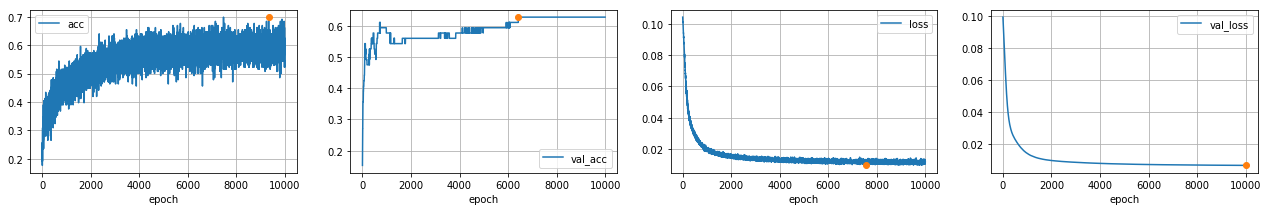

***

results/59-oxford-autoencoder-1-30-01/model\2018-03-15-19-44-41\weights.hdf5
too many values to unpack (expected 4)


,0
Batch Size,20
Decay,0.0001
Dropout,0.4
Epochs,10000
Hidden layer units,10
Learning Rate,0.0001
Loss,<function mean_squared_error at 0x000001D721FE2268>
Test size,30
Directory,results/59-oxford-autoencoder-1-30-01/model\2018-03-15-19-44-41\
Max acc,0.647059


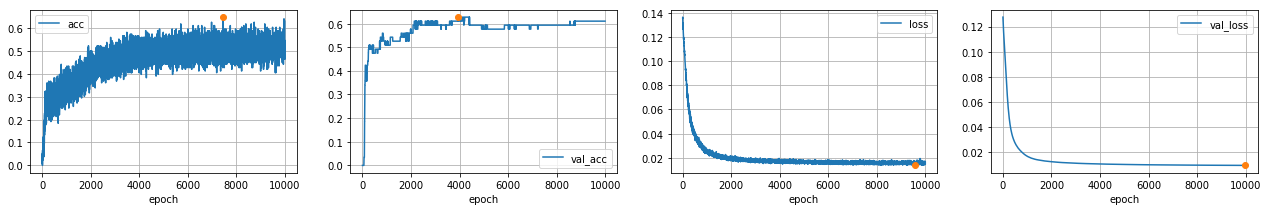

***

results/59-oxford-autoencoder-1-30-01/model\2018-03-15-19-59-09\weights.hdf5
too many values to unpack (expected 4)


,0
Batch Size,20
Decay,0.0001
Dropout,0.4
Epochs,10000
Hidden layer units,12
Learning Rate,0.0001
Loss,<function mean_squared_error at 0x000001D721FE2268>
Test size,30
Directory,results/59-oxford-autoencoder-1-30-01/model\2018-03-15-19-59-09\
Max acc,0.573529


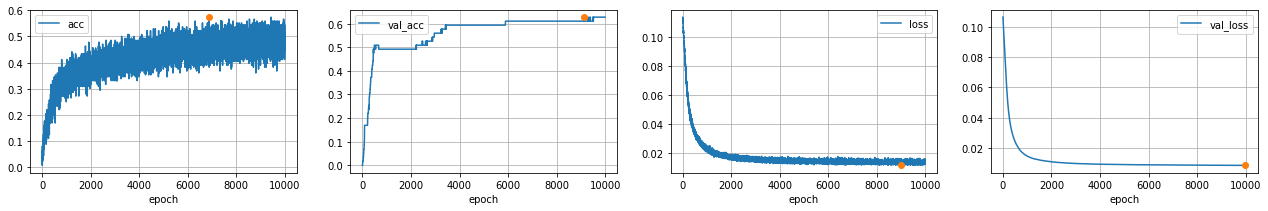

***

results/59-oxford-autoencoder-1-30-01/model\2018-03-15-20-12-23\weights.hdf5
too many values to unpack (expected 4)


,0
Batch Size,20
Decay,0.0001
Dropout,0.4
Epochs,10000
Hidden layer units,8
Learning Rate,0.0001
Loss,<function mean_squared_error at 0x000001D721FE2268>
Test size,30
Directory,results/59-oxford-autoencoder-1-30-01/model\2018-03-15-20-12-23\
Max acc,0.5


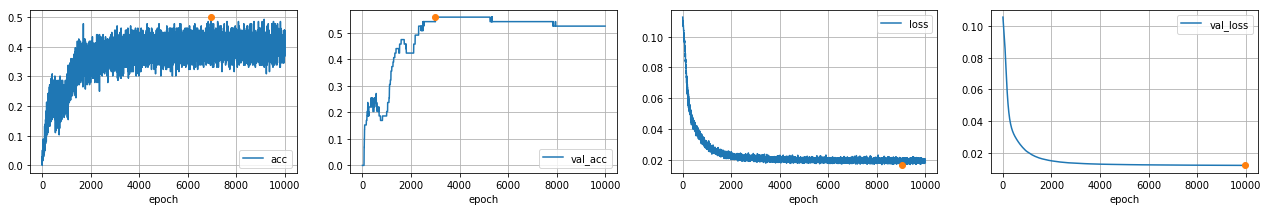

***

results/59-oxford-autoencoder-1-30-01/model\2018-03-15-20-26-06\weights.hdf5
too many values to unpack (expected 4)


,0
Batch Size,20
Decay,0.0001
Dropout,0.2
Epochs,10000
Hidden layer units,12
Learning Rate,0.0001
Loss,<function mean_squared_error at 0x000001D721FE2268>
Test size,30
Directory,results/59-oxford-autoencoder-1-30-01/model\2018-03-15-20-26-06\
Max acc,0.727941


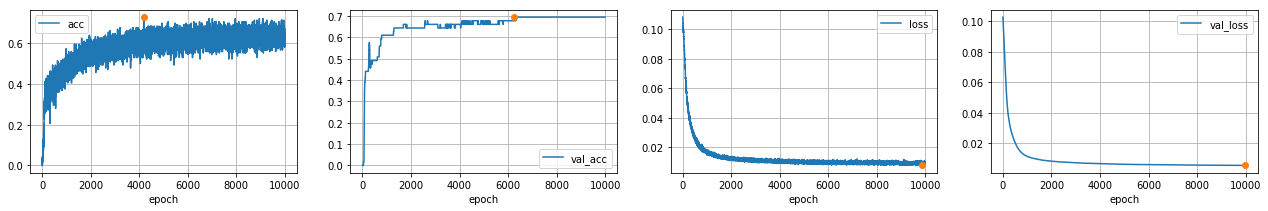

In [5]:
i = 1
for file_name in param_files:
    epoch_file_name = file_name + "epochs.csv"
    param_file_name = file_name + "params.csv"
    model_file_name = file_name + "weights.hdf5"
    epochs = pd.read_csv(epoch_file_name)
    params = pd.read_csv(param_file_name, index_col=0)
    params['Directory'] = file_name
    params['Max acc'] = get_row_extreme(epochs, 'acc', True)['acc']
    params['Max val_acc'] = get_row_extreme(epochs, 'val_acc', True)['val_acc']
    params['Min loss'] = get_row_extreme(epochs, 'loss', False)['loss']
    params['Min val_loss'] = get_row_extreme(epochs, 'val_loss', False)['val_loss']
    
    display(Markdown('***'))
    try:
        print(model_file_name)
        model = load_model(model_file_name)
        y_pred = model.predict(x_test)
        tn, fp, fn, tp = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)).ravel()
        params['AR'] = (tp+tn)/(tp+fp+tn+fn)
        params['SE'] = tp/(tp+fn)
        params['SP'] = tn/(fp+tn)
    except Exception as e: 
        print(e)
    
    display(params.transpose())
    
    # Plot all the epochs.
    plt.figure(1, figsize=(22,3))
    plt.subplot(1,4,1)
    epochs.plot(x='epoch', y='acc', ax=plt.gca())
    highlight_extreme(epochs, 'acc', plt, True)
    plt.grid(True)
    plt.subplot(1,4,2)
    epochs.plot(x='epoch', y='val_acc', ax=plt.gca())
    highlight_extreme(epochs, 'val_acc', plt, True)
    plt.grid(True)
    plt.subplot(1,4,3)
    epochs.plot(x='epoch', y='loss', ax=plt.gca())
    highlight_extreme(epochs, 'loss', plt, False)
    plt.grid(True)
    plt.subplot(1,4,4)
    epochs.plot(x='epoch', y='val_loss', ax=plt.gca())
    highlight_extreme(epochs, 'val_loss', plt, False)
    plt.grid(True)
    plt.show()
    i = i+1